In [1]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist

In [3]:
mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [4]:
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

In [5]:
print('train data = ', len(x_train_image))
print('test data = ', len(x_test_image))

train data =  60000
test data =  10000


In [6]:
x_train_image.shape

(60000, 28, 28)

In [7]:
y_train_label.shape

(60000,)

In [8]:
import matplotlib.pyplot as plt

In [9]:
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2,2)
    plt.imshow(image, cmap='binary')
    plt.show()

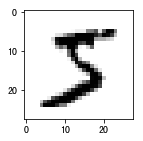

In [10]:
plot_image(x_train_image[0])

In [11]:
y_train_label[0]

5

In [12]:
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num > 25:
        num = 25
        pass
    for i in range(0, num):
        ax = plt.subplot(5, 5, i+1) #建立 subgraph子图形 为 5行 5列
        ax.imshow(images[idx], cmap='binary') # 画出 subgraph 子图形
        title= 'label=' + str(labels[idx]) # 设置子图形的title， 显示标签字段
        if len(prediction)>0: # 如果传入的预测结果
            title += ', predict='+str(prediction[idx]) # 标题
        ax.set_title(title, fontsize=10) # 设置子图形的标题
        ax.set_xticks([]) # 设置不显示刻度
        ax.set_yticks([])
        idx+=1
    plt.show()

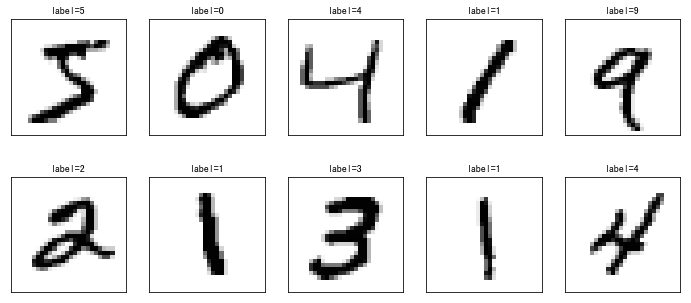

In [13]:
# 查看训练集前10项数据
plot_images_labels_prediction(x_train_image, y_train_label, [], 0, 10)

In [14]:
# 查看test中的数据集
print(' x_test_image shape: ', x_test_image.shape)
print(' y_test_label shape: ', y_test_label.shape)

 x_test_image shape:  (10000, 28, 28)
 y_test_label shape:  (10000,)


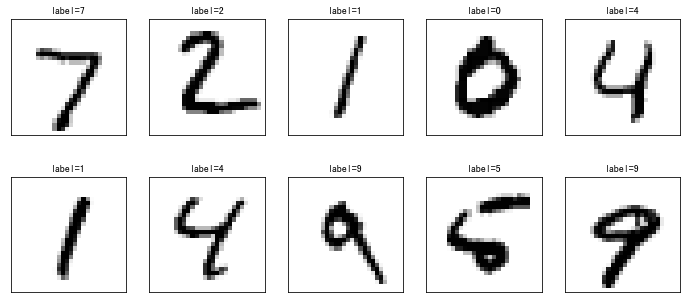

In [15]:
plot_images_labels_prediction(x_test_image, y_test_label, [], 0, 10)

### features 数据预处理
    - （1）将原本28*28的数字图像以reshape转换为一维的向量，其长度是784，并且转换为FLoat
    - （2）数字图像image的数字标准化

In [16]:
# 查看每一个数字图像的shape
print('x_train_image: ', x_train_image.shape)
print('y_train_label: ', y_train_label.shape)

x_train_image:  (60000, 28, 28)
y_train_label:  (60000,)


In [ ]:
# 将IMage 以reshape转换， 把原本28*28的二维图像转换为784的一维图像

In [17]:
x_Train = x_train_image.reshape(60000, 784).astype('float32')

ValueError: cannot reshape array of size 7840000 into shape (60000,784)

In [18]:
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [19]:
# 查看转换后的内容
x_Train.shape

(60000, 784)

In [20]:
x_Test.shape

(10000, 784)

In [22]:
# 输出第一个图片的内容
print(x_Train[0])
print(len(x_Train[0]))

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

In [24]:
# 5.把数字图像images的数字标准化
# image图像标准化可以提高后续训练的模型的准确度，因为是0-255的值，所以最简单的标准化方式是除以255
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [25]:
# 查看标准化后的结果
x_Train_normalize[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### 数据预处理

In [26]:
y_train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [28]:
y_train_label

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [29]:
# 使用np_utils.to_categorical, 分别传入y_train_label（训练数据）,y_test_label（测试数据）的label标签，进行One-Hot Encoding转换
y_TrainOnehot = np_utils.to_categorical(y_train_label)
y_TestOnehot = np_utils.to_categorical(y_test_label)

In [30]:
y_TrainOnehot[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)